<a href="https://colab.research.google.com/github/chalistahazizah/Sales_Analysis/blob/main/ANALISIS_PENJUALAN_WARUNG_BU_YUNI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.ticker as mticker
from IPython.display import display
from tabulate import tabulate

### **Read Data**

In [63]:
df=pd.read_csv('/content/sample_data/penjualanbuyuni.csv')

print("Jumlah data :", df.shape[0])
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

Jumlah data : 3807
+---+----+------------+------------+-------------+--------------+
|   | ID |  TANGGAL   | PEMBAYARAN | NAMA PRODUK | HARGA PRODUK |
+---+----+------------+------------+-------------+--------------+
| 0 | 1  | 01-08-2024 |    QRIS    |  MIE AYAM   |    12000     |
| 1 | 2  | 01-08-2024 |    QRIS    |  MIE AYAM   |    12000     |
| 2 | 3  | 01-08-2024 |    QRIS    |  GORENGAN   |     1000     |
| 3 | 4  | 01-08-2024 |    QRIS    |  GORENGAN   |     1000     |
| 4 | 5  | 01-08-2024 |    QRIS    |  GORENGAN   |     1000     |
+---+----+------------+------------+-------------+--------------+


### **Preprocessing Data**

In [64]:
# Menyesuaikan tipe data
df['ID'] = df['ID'].astype(int)
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], format='%d-%m-%Y', errors='coerce')
df['PEMBAYARAN'] = df['PEMBAYARAN'].astype(str)
df['NAMA PRODUK'] = df['NAMA PRODUK'].astype(str)
df['HARGA PRODUK'] = pd.to_numeric(df['HARGA PRODUK'], errors='coerce').fillna(0).astype(int)
print("Tipe data:\n", df.dtypes, "\n")

# Menghilangkan duplikat
print("Jumlah data sebelum menghapus duplikat:", df.shape[0])
df_no_duplicates = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", df_no_duplicates.shape[0])

# Menghilangkan missing value
print("Jumlah data sebelum menghilangkan missing value:", df_no_duplicates.shape[0])
df_cleaned = df_no_duplicates.dropna()
print("Jumlah data setelah menghilangkan missing value:", df_cleaned.shape[0],"\n")


Tipe data:
 ID                       int64
TANGGAL         datetime64[ns]
PEMBAYARAN              object
NAMA PRODUK             object
HARGA PRODUK             int64
dtype: object 

Jumlah data sebelum menghapus duplikat: 3807
Jumlah data setelah menghapus duplikat: 3807
Jumlah data sebelum menghilangkan missing value: 3807
Jumlah data setelah menghilangkan missing value: 3807 



### **Penjualan Terbanyak**

In [65]:
top_sales = df_cleaned['TANGGAL'].value_counts().reset_index()
top_sales.columns = ['TANGGAL', 'JUMLAH PENJUALAN']
print("Jumlah penjualan berdasarkan tanggal:\n", top_sales)

Jumlah penjualan berdasarkan tanggal:
       TANGGAL  JUMLAH PENJUALAN
0  2024-08-13               307
1  2024-08-06               277
2  2024-08-27               215
3  2024-08-12               209
4  2024-08-05               201
5  2024-08-08               201
6  2024-08-09               198
7  2024-08-20               188
8  2024-08-14               177
9  2024-08-15               176
10 2024-08-02               169
11 2024-08-29               164
12 2024-08-01               164
13 2024-08-07               156
14 2024-08-19               148
15 2024-08-23               145
16 2024-08-22               132
17 2024-08-30               126
18 2024-08-21               125
19 2024-08-16               122
20 2024-08-26               104
21 2024-08-28               103


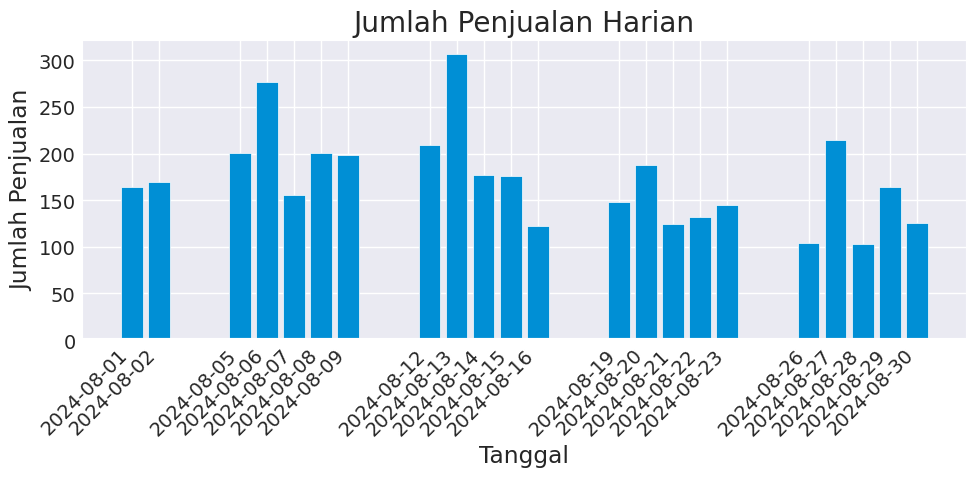

In [66]:
plt.figure(figsize=(10, 5))
plt.bar(top_sales['TANGGAL'], top_sales['JUMLAH PENJUALAN'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.title('Jumlah Penjualan Harian')
plt.xticks(top_sales['TANGGAL'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Pendapatan Terbanyak**

In [67]:
top_revenue = df_cleaned.groupby('TANGGAL')['HARGA PRODUK'].sum().reset_index()
top_revenue = top_revenue.sort_values(by='HARGA PRODUK', ascending=False)
print("Jumlah pendapatan berdasarkan tanggal:\n", top_revenue)


Jumlah pendapatan berdasarkan tanggal:
       TANGGAL  HARGA PRODUK
8  2024-08-13       2520500
3  2024-08-06       2365000
7  2024-08-12       1836000
18 2024-08-27       1814500
5  2024-08-08       1794500
2  2024-08-05       1707000
6  2024-08-09       1688500
9  2024-08-14       1563000
13 2024-08-20       1518000
10 2024-08-15       1509500
1  2024-08-02       1483000
0  2024-08-01       1426500
20 2024-08-29       1398000
12 2024-08-19       1304500
16 2024-08-23       1267000
4  2024-08-07       1262500
14 2024-08-21       1086500
21 2024-08-30       1082500
15 2024-08-22       1045000
11 2024-08-16       1003500
19 2024-08-28        876500
17 2024-08-26        865000


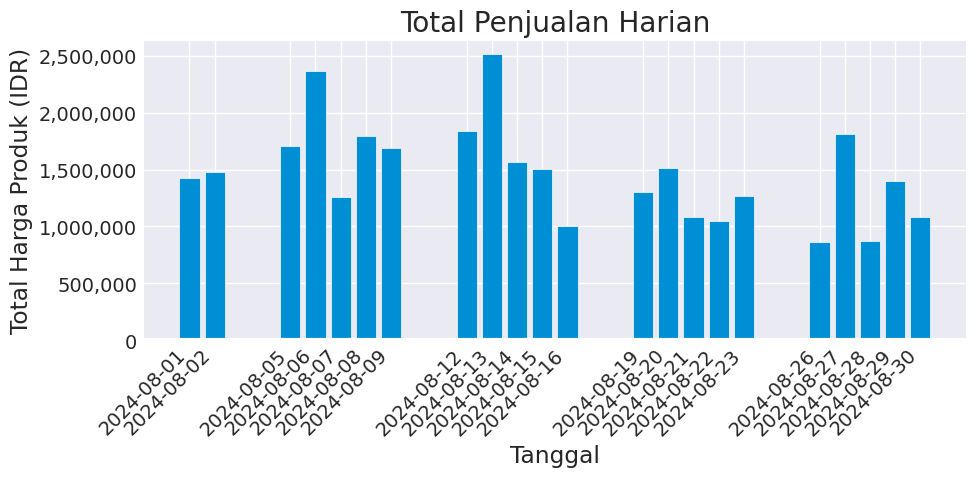

In [68]:
plt.figure(figsize=(10, 5))
plt.bar(top_revenue['TANGGAL'], top_revenue['HARGA PRODUK'])
plt.xlabel('Tanggal')
plt.ylabel('Total Harga Produk (IDR)')
plt.title('Total Penjualan Harian')
plt.xticks(top_revenue['TANGGAL'], rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### **Metode Pembayaran Terbanyak**

In [69]:
top_payment_method = df_cleaned['PEMBAYARAN'].value_counts().reset_index()
top_payment_method.columns = ['PEMBAYARAN', 'JUMLAH PEMBAYARAN']
print("Jumlah pembayaran:\n", top_payment_method)

Jumlah pembayaran:
   PEMBAYARAN  JUMLAH PEMBAYARAN
0       QRIS               3545
1       CASH                262


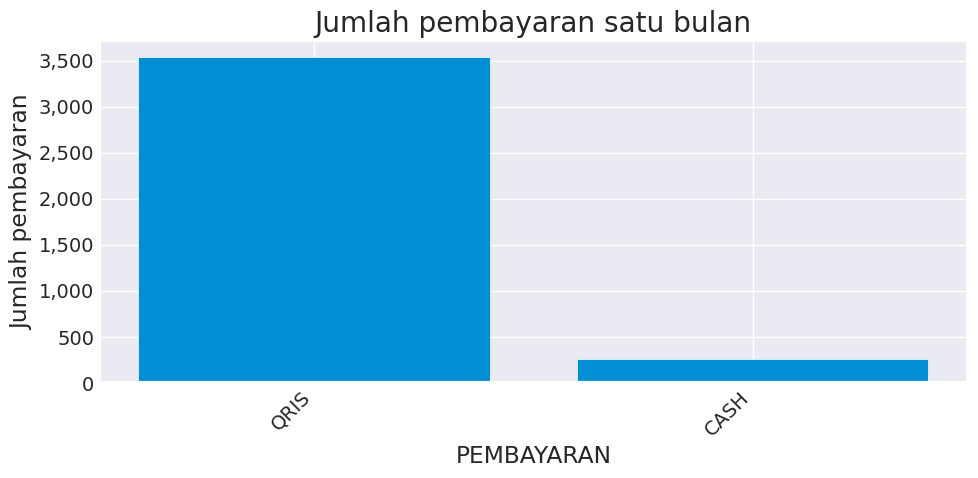

In [70]:
plt.figure(figsize=(10, 5))
plt.bar(top_payment_method['PEMBAYARAN'], top_payment_method['JUMLAH PEMBAYARAN'])
plt.xlabel('PEMBAYARAN')
plt.ylabel('Jumlah pembayaran')
plt.title('Jumlah pembayaran satu bulan')
plt.xticks(top_payment_method['PEMBAYARAN'], rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### **Jenis Pembayaran Tiap Produk**

In [71]:
product_payment_methods = df_cleaned.groupby('NAMA PRODUK')['PEMBAYARAN'].value_counts().reset_index(name='JUMLAH JENIS PEMBAYARAN')
product_payment_methods = product_payment_methods.sort_values(by='JUMLAH JENIS PEMBAYARAN', ascending=False)
print("Jumlah jenis pembayaran:\n", product_payment_methods)

Jumlah jenis pembayaran:
      NAMA PRODUK PEMBAYARAN  JUMLAH JENIS PEMBAYARAN
20      MIE AYAM       QRIS                     1618
34         PECEL       QRIS                      340
0           AQUA       QRIS                      248
32     NUTRISARI       QRIS                      231
39           TEH       QRIS                      229
11      ES JERUK       QRIS                      147
14      GORENGAN       QRIS                      145
37       POP ICE       QRIS                      124
21      MIE AYAM       CASH                      100
43         TELUR       QRIS                       88
24     NASI AYAM       QRIS                       74
13      GOOD DAY       QRIS                       52
35         PECEL       CASH                       41
26      NASI SUP       QRIS                       41
28    NASI TELUR       QRIS                       33
2           AYAM       QRIS                       26
46       TONGKOL       QRIS                       25
15      GORENGAN    

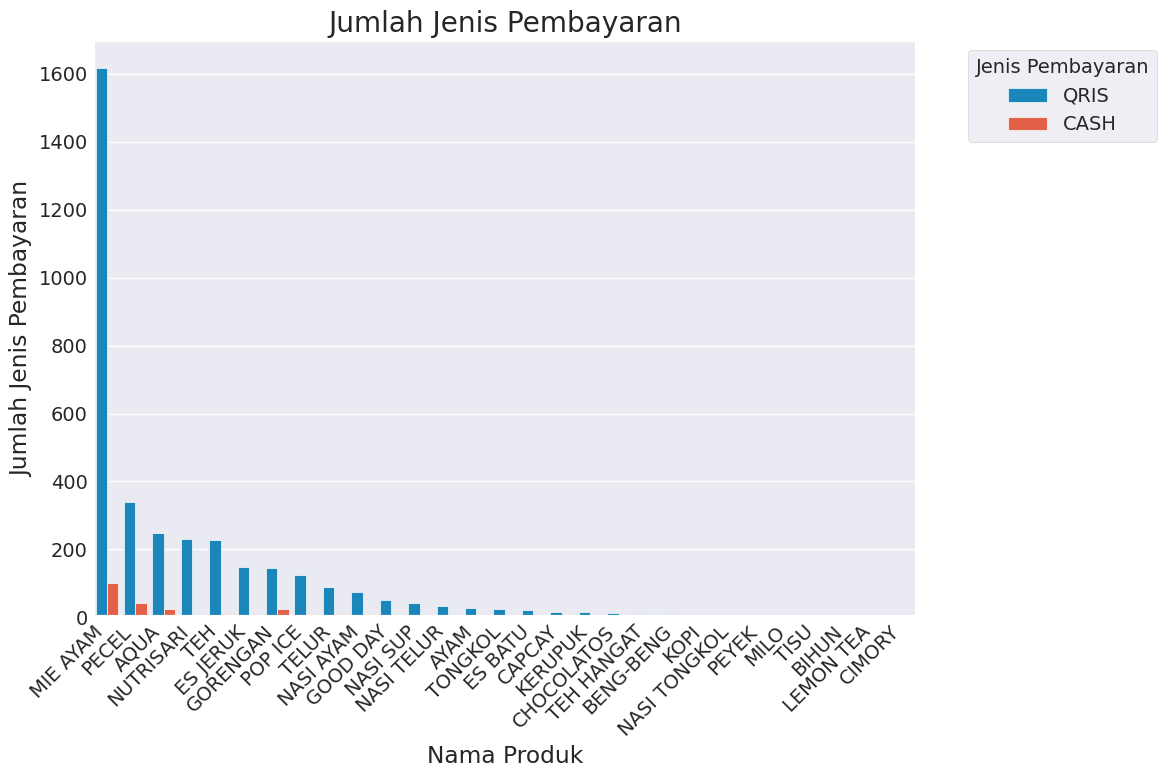

In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(data=product_payment_methods, x='NAMA PRODUK', y='JUMLAH JENIS PEMBAYARAN', hue='PEMBAYARAN')
plt.title("Jumlah Jenis Pembayaran")
plt.xlabel("Nama Produk")
plt.ylabel("Jumlah Jenis Pembayaran")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Jenis Pembayaran', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### **Jumlah Pembelian Tiap Produk**

In [73]:
product_purchase_counts = df_cleaned.groupby('NAMA PRODUK')['ID'].count().reset_index(name='JUMLAH PEMBELIAN')
product_purchase_counts = product_purchase_counts.sort_values(by='JUMLAH PEMBELIAN', ascending=False)
print("Jumlah pembelian tiap produk:\n", product_purchase_counts)

Jumlah pembelian tiap produk:
      NAMA PRODUK  JUMLAH PEMBELIAN
14      MIE AYAM              1718
21         PECEL               381
0           AQUA               272
24           TEH               238
20     NUTRISARI               238
10      GORENGAN               169
8       ES JERUK               154
23       POP ICE               135
26         TELUR                97
16     NASI AYAM                85
9       GOOD DAY                52
17      NASI SUP                43
18    NASI TELUR                40
1           AYAM                29
28       TONGKOL                25
7        ES BATU                22
4         CAPCAY                17
11       KERUPUK                17
5     CHOCOLATOS                12
25    TEH HANGAT                11
19  NASI TONGKOL                 9
2      BENG-BENG                 9
15          MILO                 8
12          KOPI                 8
22         PEYEK                 6
13     LEMON TEA                 3
6         CIMORY        

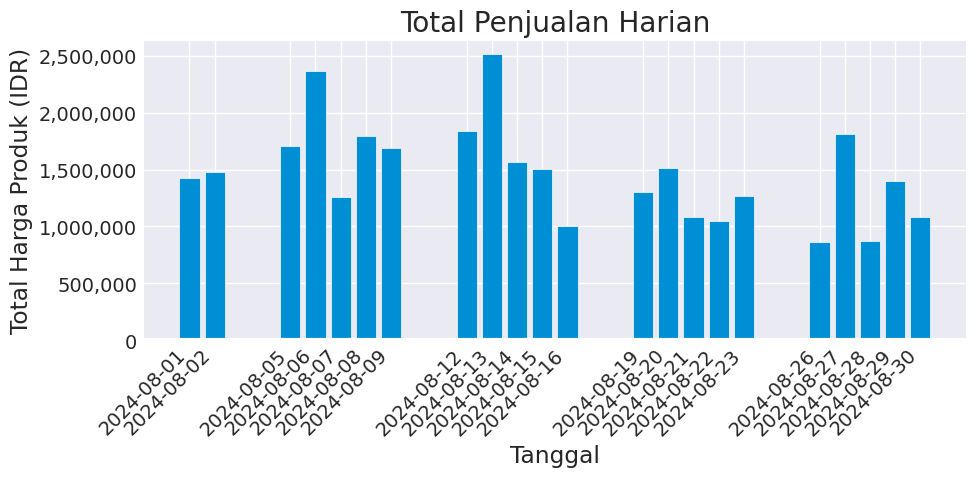

In [74]:
plt.figure(figsize=(10, 5))
plt.bar(top_revenue['TANGGAL'], top_revenue['HARGA PRODUK'])
plt.xlabel('Tanggal')
plt.ylabel('Total Harga Produk (IDR)')
plt.title('Total Penjualan Harian')
plt.xticks(top_revenue['TANGGAL'], rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### **Jumlah Pendapatan Hari Terbanyak**

In [92]:
df_cleaned['HARI'] = df_cleaned['TANGGAL'].dt.day_name()
revenue_day = df_cleaned.groupby('HARI')['HARGA PRODUK'].sum().reset_index()
revenue_day.columns = ['HARI', 'JUMLAH PENDAPATAN']
revenue_day = revenue_day.sort_values(by='JUMLAH PENDAPATAN', ascending=False)

print("Jumlah pendapatan per hari:\n", revenue_day)


Jumlah pendapatan per hari:
         HARI  JUMLAH PENDAPATAN
3    Tuesday            8218000
2   Thursday            7173500
0     Friday            6524500
1     Monday            5712500
4  Wednesday            4788500


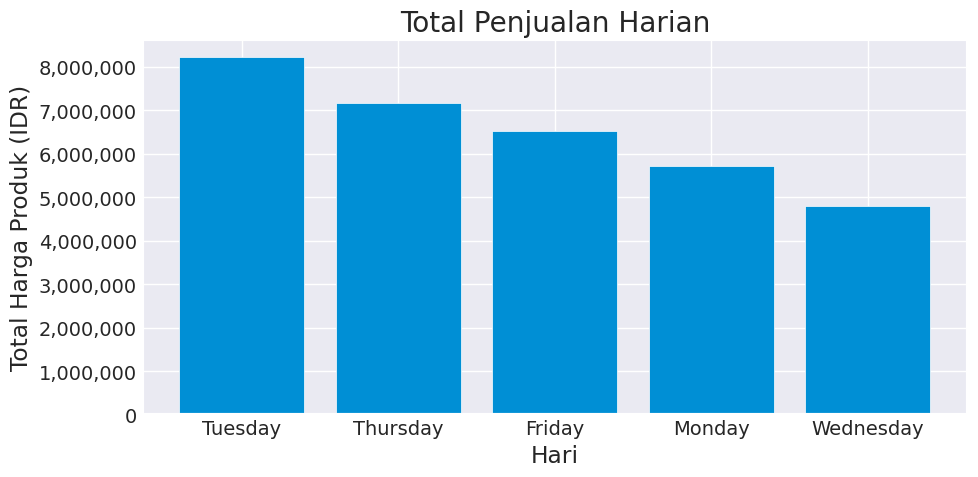

In [94]:
plt.figure(figsize=(10, 5))
plt.bar(revenue_day['HARI'], revenue_day['JUMLAH PENDAPATAN'])
plt.xlabel('Hari')
plt.ylabel('Total Harga Produk (IDR)')
plt.title('Total Penjualan Harian')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### **Jumlah Transaksi Pembelian Tiap Produk**

In [75]:
revenue_product = df_cleaned.groupby('NAMA PRODUK')['HARGA PRODUK'].sum().reset_index(name='JUMLAH PENDAPATAN')
revenue_product = revenue_product.sort_values(by='JUMLAH PENDAPATAN', ascending=False)
print("Jumlah pendapatan tiap produk:\n", revenue_product)


Jumlah pendapatan tiap produk:
      NAMA PRODUK  JUMLAH PENDAPATAN
14      MIE AYAM           20616000
21         PECEL            3810000
20     NUTRISARI            1206000
0           AQUA            1088000
16     NASI AYAM            1004000
24           TEH             927500
8       ES JERUK             770000
23       POP ICE             675000
26         TELUR             388000
18    NASI TELUR             320000
17      NASI SUP             301000
9       GOOD DAY             260000
1           AYAM             232000
10      GORENGAN             169000
28       TONGKOL             125000
5     CHOCOLATOS              84000
19  NASI TONGKOL              81000
15          MILO              56000
2      BENG-BENG              54000
4         CAPCAY              51000
12          KOPI              40000
25    TEH HANGAT              38500
6         CIMORY              27000
11       KERUPUK              25500
7        ES BATU              22000
13     LEMON TEA              15

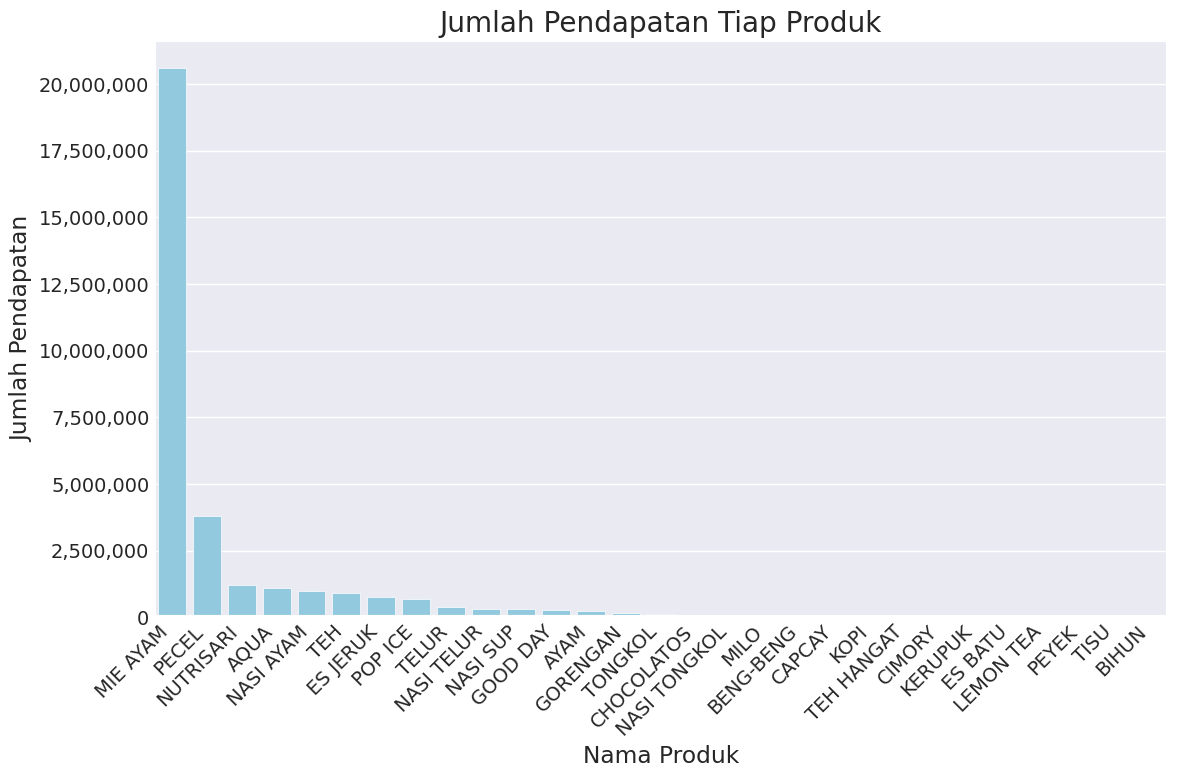

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(data=revenue_product, x='NAMA PRODUK', y='JUMLAH PENDAPATAN', color='skyblue')
plt.title("Jumlah Pendapatan Tiap Produk")
plt.xlabel("Nama Produk")
plt.ylabel("Jumlah Pendapatan")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

##**RANGKUMAN PRODUK**

In [77]:
product_summary = df_cleaned.groupby('NAMA PRODUK').agg(
    Jumlah=('ID', 'count'),
    Total=('HARGA PRODUK', 'sum')
).reset_index()

product_summary = product_summary.sort_values('NAMA PRODUK', ascending=True)
product_summary['Total'] = product_summary['Total'].round(2)
product_summary = product_summary.sort_values(by='Total', ascending=False)

print(product_summary)

     NAMA PRODUK  Jumlah     Total
14      MIE AYAM    1718  20616000
21         PECEL     381   3810000
20     NUTRISARI     238   1206000
0           AQUA     272   1088000
16     NASI AYAM      85   1004000
24           TEH     238    927500
8       ES JERUK     154    770000
23       POP ICE     135    675000
26         TELUR      97    388000
18    NASI TELUR      40    320000
17      NASI SUP      43    301000
9       GOOD DAY      52    260000
1           AYAM      29    232000
10      GORENGAN     169    169000
28       TONGKOL      25    125000
5     CHOCOLATOS      12     84000
19  NASI TONGKOL       9     81000
15          MILO       8     56000
2      BENG-BENG       9     54000
4         CAPCAY      17     51000
12          KOPI       8     40000
25    TEH HANGAT      11     38500
6         CIMORY       3     27000
11       KERUPUK      17     25500
7        ES BATU      22     22000
13     LEMON TEA       3     15000
22         PEYEK       6     12000
27          TISU    